# Capstone Project - The Battle of Neighborhoods
## Finding an optimized method for delivering fresh produce in the nearby restaurants/cafe in North York, Toronto

Note: This is the second part of the project. The first part is saved as The_Battle_Of_Neighborhoods_week_1. Thank you!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt

In [2]:
from bs4 import BeautifulSoup
import requests # library to handle requests
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

The file Toronto_data.csv was built in the week 1 section

In [3]:
df1 = pd.read_csv('Toronto_data')
df1.drop(['Unnamed: 0'] , axis = 1 , inplace = True )

In [4]:
df1.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Port Union,Rouge Hill,Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"West Hill,Guildwood,Morningside",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


Preparing data to explore the North York Borough

In [5]:
df_northyork = df1[df1['Borough'] == 'North York']
df_northyork.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
17,M2H,North York,Hillcrest Village,43.803762,-79.363452
18,M2J,North York,"Oriole,Fairview,Henry Farm",43.778517,-79.346556
19,M2K,North York,Bayview Village,43.786947,-79.385975
20,M2L,North York,"Silver Hills,York Mills",43.757490,-79.374714
21,M2M,North York,"Willowdale,Newtonbrook",43.789053,-79.408493


In [6]:
# Getting co-ordinates of Toronto from geopy
address1 = 'North York, Toronto'
geolocator = Nominatim()
locNY = geolocator.geocode(address1)
latNY = locNY.latitude
lonNY = locNY.longitude
print('The geograpical coordinate of North York are {}, {}.'.format(latNY, lonNY))

C:\Users\spande2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.19.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of North York are 43.7708175, -79.4132998.


Creating MAP for the neighbourhood

In [7]:
map_NY = folium.Map(location=[latNY, lonNY], zoom_start=11.5)

# add markers to map
for lat, lng, label in zip(df_northyork['Latitude'], df_northyork['Longitude'], df_northyork['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius = 3,
        popup = label,
        color ='blue',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7).add_to(map_NY)  
    
map_NY

Looking around the neighborhood North York

In [8]:
def foursquare_explore (postal_code_list, neighborhood_list, lat_list, lng_list, LIMIT = 500, radius = 1000):
    result_ds = []
    counter = 0
    for postal_code, neighborhood, lat, lng in zip(postal_code_list, neighborhood_list, lat_list, lng_list):
         
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, 
            lat, lng, radius, LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        tmp_dict = {}
        tmp_dict['Postal Code'] = postal_code; tmp_dict['Neighborhood(s)'] = neighborhood; 
        tmp_dict['Latitude'] = lat; tmp_dict['Longitude'] = lng;
        tmp_dict['Crawling_result'] = results;
        result_ds.append(tmp_dict)
        counter += 1
        
    return result_ds;

In [9]:
#FourSquare
CLIENT_ID = 'SNDJRIX52E0CF3WE1XK54GRUZEQDWDOPJRJSEIWFXVEALGY5' # your Foursquare ID
CLIENT_SECRET = 'QLPKCSVLE0ROOUHXJ0N3NQQVYCZULQE511IDV1BDIDKVR0OW' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [10]:
NY_Foursquare_Dataset = foursquare_explore(list(df_northyork['Postcode']),list(df_northyork['Neighbourhood']),
                           list(df_northyork['Latitude']),list(df_northyork['Longitude']),)

In [11]:
NY_Foursquare_Dataset[1]

{'Postal Code': 'M2J',
 'Neighborhood(s)': 'Oriole,Fairview,Henry Farm',
 'Latitude': 43.7785175,
 'Longitude': -79.3465557,
 'Crawling_result': [{'reasons': {'count': 0,
    'items': [{'summary': 'This spot is popular',
      'type': 'general',
      'reasonName': 'globalInteractionReason'}]},
   'venue': {'id': '4e848fbb5c5c9240de8e6a80',
    'name': 'The LEGO Store',
    'location': {'address': '1800 Sheppard Ave E',
     'crossStreet': 'at Don Mills Rd',
     'lat': 43.77820727238842,
     'lng': -79.34348299621146,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.77820727238842,
       'lng': -79.34348299621146}],
     'distance': 249,
     'postalCode': 'M2J 5A7',
     'cc': 'CA',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['1800 Sheppard Ave E (at Don Mills Rd)',
      'Toronto ON M2J 5A7',
      'Canada']},
    'categories': [{'id': '4bf58dd8d48988d1f3941735',
      'name': 'Toy / Game Store',
      'pluralName': 

In [12]:
def get_venue_dataset(foursquare_dataset):
    result_df = pd.DataFrame(columns = ['Postcode', 'Neighbourhood', 
                                           'Neighbourhood Latitude', 'Neighbourhood Longitude','Venue_id',
                                          'Venue', 'Venue Category', 'Venue_lat' , 'Venue_lng'])
    # print(result_df)
    
    for neigh_dict in foursquare_dataset:
        postal_code = neigh_dict['Postal Code']; neigh = neigh_dict['Neighborhood(s)']
        lat = neigh_dict['Latitude']; lng = neigh_dict['Longitude']
    
        for venue_dict in neigh_dict['Crawling_result']:
            name = venue_dict['venue']['name']
            vlat = venue_dict['venue']['location']['lat']
            vlng = venue_dict['venue']['location']['lng']
            cat =  venue_dict['venue']['categories'][0]['name']
            vid = venue_dict['venue']['id']
            
            
            
          
            result_df = result_df.append({'Postcode': postal_code, 'Neighbourhood': neigh, 
                              'Neighbourhood Latitude': lat, 'Neighbourhood Longitude':lng,'Venue_id':vid,
                              'Venue': name,'Venue Category': cat, 'Venue_lat': vlat ,'Venue_lng': vlng }, 
                                ignore_index = True)
            
    return(result_df)

In [13]:
df_NY = get_venue_dataset(NY_Foursquare_Dataset)

In [14]:
df_NY.shape

(609, 9)

In [15]:
len(list(df_NY['Venue Category'].unique()))

156

In [16]:
df_NY['Venue Category'].unique()

array(['Korean Restaurant', 'Bakery', 'Grocery Store', 'Park',
       'Coffee Shop', 'Pizza Place', 'Bank', 'Sandwich Place', 'Pharmacy',
       'Housing Development', 'Chinese Restaurant', 'Ice Cream Shop',
       'Shopping Mall', 'Recreation Center',
       'Residential Building (Apartment / Condo)', 'Diner',
       'Convenience Store', 'Toy / Game Store', 'Electronics Store',
       'Burger Joint', 'Movie Theater', 'Tea Room', 'Candy Store',
       'American Restaurant', 'Department Store', 'Juice Bar',
       'Fast Food Restaurant', 'Salon / Barbershop', 'Clothing Store',
       'Smoothie Shop', 'Caribbean Restaurant', 'Japanese Restaurant',
       'Theater', 'Food Court', 'Restaurant', 'Liquor Store',
       'Sporting Goods Shop', 'Supermarket', 'Beer Store',
       'Fried Chicken Joint', 'Café', 'Skating Rink', 'Skate Park',
       'Pool', 'Asian Restaurant', 'Hookah Bar',
       'Middle Eastern Restaurant', 'Dessert Shop', 'Hot Dog Joint',
       'Indian Restaurant', 'Ramen Rest

In [17]:
df_final = df_NY[(df_NY['Venue Category'].str.contains('Coffee')) | (df_NY['Venue Category'].str.contains('Restaurant')) 
                | (df_NY['Venue Category'].str.contains('Breakfast')) | (df_NY['Venue Category'].str.contains('Café'))
                | (df_NY['Venue Category'].str.contains('Bakery')) | (df_NY['Venue Category'].str.contains('Grocery'))]

In [18]:
df_final.shape

(246, 9)

In [19]:
df_final.head()

,Postcode,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue_id,Venue,Venue Category,Venue_lat,Venue_lng
0,M2H,Hillcrest Village,43.803762,-79.363452,50c138e4e4b0276c8687f23c,고려삼계탕 Korean Ginseng Chicken Soup & Bibimbap,Korean Restaurant,43.798391,-79.369187
1,M2H,Hillcrest Village,43.803762,-79.363452,4bd9842be914a593adbd56fa,Tastee,Bakery,43.807722,-79.356798
2,M2H,Hillcrest Village,43.803762,-79.363452,4b60e72df964a520a1002ae3,Galati,Grocery Store,43.797831,-79.369410
4,M2H,Hillcrest Village,43.803762,-79.363452,4ad88a4ff964a520251221e3,Tim Hortons,Coffee Shop,43.798945,-79.369644
10,M2H,Hillcrest Village,43.803762,-79.363452,4b2e6ff4f964a52022e024e3,Tim Hortons,Coffee Shop,43.811852,-79.359501


In [20]:
len(list(df_final['Venue Category'].unique()))

33

In [21]:
map1 = folium.Map(location=[latNY, lonNY], zoom_start=11)
c=0
# add markers to map
for lat, lng, label in zip(df_final['Venue_lat'], df_final['Venue_lng'], df_final['Venue']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius = 3,
        popup = label,
        color ='red',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7).add_to(map1)  
    c=c+1
    
map1

### K-Means Clsutering

In [22]:
from sklearn.cluster import KMeans

In [23]:
df_kmeans = df_final[['Venue_lat' ,'Venue_lng']]

In [24]:
from sklearn.metrics import silhouette_score

In [25]:
sil = []
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n , random_state=0).fit(df_kmeans)
    label = kmeans.labels_
    sil.append(silhouette_score(df_kmeans, label, metric='euclidean'))
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n, sil[n-2]))


For n_clusters=2, The Silhouette Coefficient is 0.4875255595737943
For n_clusters=3, The Silhouette Coefficient is 0.5522426220381165
For n_clusters=4, The Silhouette Coefficient is 0.5784311363159121
For n_clusters=5, The Silhouette Coefficient is 0.5600758485822365
For n_clusters=6, The Silhouette Coefficient is 0.5570218436348096
For n_clusters=7, The Silhouette Coefficient is 0.5571911121063303
For n_clusters=8, The Silhouette Coefficient is 0.5611390621951564
For n_clusters=9, The Silhouette Coefficient is 0.5491361690640616
For n_clusters=10, The Silhouette Coefficient is 0.5556615997604348


As can be seen from the above results, the model accuracy increases with an increase in the value of K till K = 4 and then starts decreasing

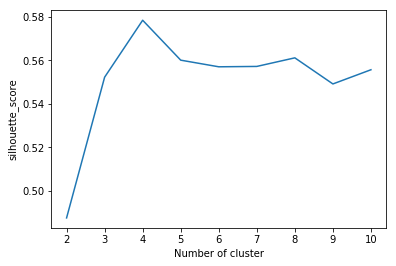

In [26]:
#It can shown using a plot as well
plt.figure()
plt.plot(list(range(2,11)), sil)
plt.xlabel("Number of cluster")
plt.ylabel("silhouette_score")
plt.show()

Based on the above coefficient values and the graph, we conclude that model accuracy for values between K = 3 and K = 5 are best. Let's visualize the results for K = 4

In [27]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_kmeans)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[:5]

array([1, 1, 1, 1, 1])

In [28]:
df_final['Cluster Labels'] = kmeans.labels_

C:\Users\spande2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
# create map
map_clusters = folium.Map(location=[latNY, lonNY], zoom_start=11)
d=0
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_final['Venue_lat'], df_final['Venue_lng'], df_final['Venue'], df_final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    d=d+1
       
        
map_clusters